Compare retailer order outcomes, promotion usage, and how they affect profitability

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

amazon_sales_data = Path("../output/cleaned_Amazon Sale Report.csv")

# Read in the data. 
sales_df = pd.read_csv(amazon_sales_data)



In [2]:
sales_df.head()

,Order ID,Date,Status,Status (Successful),Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids
0,405-8078784-5731545,04-30-22,Cancelled,False,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN
1,171-9198151-1101146,04-30-22,Delivered,True,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,Kurta,3XL,B09K3WFS32,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...
2,403-9615377-8133951,04-30-22,Cancelled,False,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN
3,406-7807733-3785945,04-30-22,Delivered,True,Merchant,Standard,JNE3405,JNE3405-KR-S,Kurta,S,B081WX4G4Q,1,399.00,HYDERABAD,TELANGANA,500032.0,Amazon PLCC Free-Financing Universal Merchant ...
4,407-5443024-5233168,04-30-22,Cancelled,False,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108


In [3]:
sales_df.columns

Index(['Order ID', 'Date', 'Status', 'Status (Successful)', 'Fulfilment',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'promotion-ids'],
      dtype='object')

In [4]:
sales_df.nunique().to_frame(name="Count of Unique Values")


,Count of Unique Values
Order ID,46367
Date,91
Status,3
Status (Successful),2
Fulfilment,2
ship-service-level,2
Style,1185
SKU,5595
Category,7
Size,11


In [5]:
# Reset the index to move 'Fulfillment' back to a column
sales_df.reset_index(inplace=True)
sales_df

,index,Order ID,Date,Status,Status (Successful),Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids
0,0,405-8078784-5731545,04-30-22,Cancelled,False,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN
1,1,171-9198151-1101146,04-30-22,Delivered,True,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,Kurta,3XL,B09K3WFS32,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...
2,2,403-9615377-8133951,04-30-22,Cancelled,False,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN
3,3,406-7807733-3785945,04-30-22,Delivered,True,Merchant,Standard,JNE3405,JNE3405-KR-S,Kurta,S,B081WX4G4Q,1,399.00,HYDERABAD,TELANGANA,500032.0,Amazon PLCC Free-Financing Universal Merchant ...
4,4,407-5443024-5233168,04-30-22,Cancelled,False,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,0,NaN,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49841,49841,402-0082204-6323568,05-31-22,Cancelled,False,Amazon,Expedited,JNE3797,JNE3797-KR-A-XL,Western Dress,XL,B09TH3H2DP,1,771.00,Junagadh,Gujarat,362001.0,NaN
49842,49842,408-9803724-6565965,05-31-22,Cancelled,False,Amazon,Expedited,MEN5024,MEN5024-KR-L,Kurta,L,B08YYSQJTC,1,665.00,MUMBAI,MAHARASHTRA,400056.0,NaN
49843,49843,408-5154281-4593912,05-31-22,Cancelled,False,Amazon,Expedited,J0119,J0119-TP-XXXL,Top,3XL,B08RYPRVPV,1,574.00,Prayagraj (ALLAHABAD),UTTAR PRADESH,211007.0,NaN
49844,49844,404-5182288-1653947,05-31-22,Cancelled,False,Amazon,Expedited,JNE3638,JNE3638-KR-XS,Kurta,XS,B09814Q3QH,0,NaN,Kolkata,WEST BENGAL,700040.0,NaN


In [6]:
# Group by 'Fulfilment' and 'Status' to count occurrences
status_counts = sales_df.groupby(['Fulfilment', 'Status']).size().reset_index(name='Count')



In [12]:
#define file output Path
output_path='../Images/RM_merchant chart/'

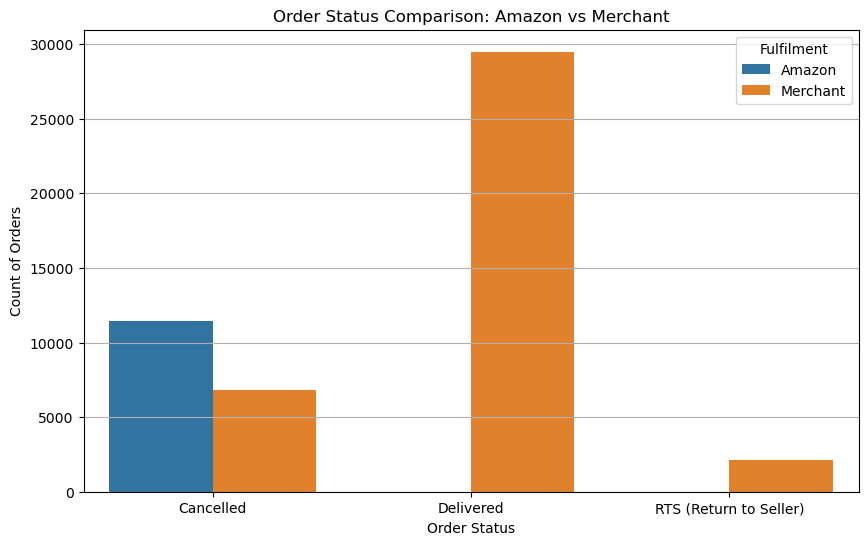

In [13]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=status_counts, x='Status', y='Count', hue='Fulfilment')
plt.title('Order Status Comparison: Amazon vs Merchant')
plt.xlabel('Order Status')
plt.ylabel('Count of Orders')
plt.legend(title='Fulfilment')
plt.grid(axis='y')

# Save the plot as an image file
plt.savefig(f'{output_path}RM_Amazon vs Merchant Comparison.png')

#plt.savefig('../Images/RM_Amazon vs Merchant Comparison.png')  # Save as PNG
plt.show()


The sample data is grouped by "Fulfillment" and "Status," counting how many orders fall into each category. The majority of orders that were fulfilled by the merchant were succesfully delivered. From the orders that were cancelled, Amazon had about 12,000 and the merchants had about 6,000.


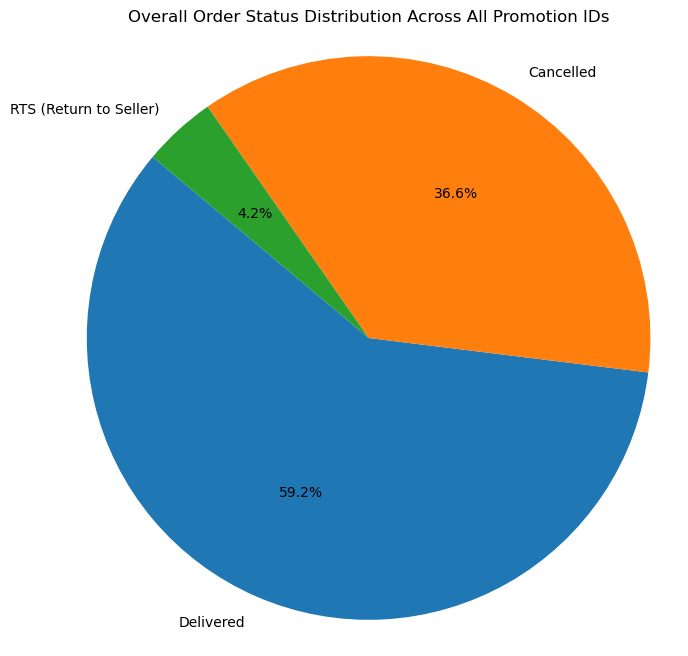

In [14]:
# Group by 'Status' to count occurrences across all promotion IDs
overall_status_counts = sales_df['Status'].value_counts().reset_index()
overall_status_counts.columns = ['Status', 'Count']

# Create a pie chart for overall order status distribution
plt.figure(figsize=(8, 8))
plt.pie(overall_status_counts['Count'], labels=overall_status_counts['Status'], autopct='%1.1f%%', startangle=140)
plt.title('Overall Order Status Distribution Across All Promotion IDs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the pie chart as an image file
plt.savefig(f'{output_path}RM_Overall Order Status.png')  # Save as PNG

plt.show()  # Display the plot

The pie chart provides a visual representation of how many orders fall into each status category across all promotion IDs. The orders that used the promotion id's came out to 59.2% delivered and 36.6% cancelled. Successful deliveries were more than half with orders using the promotion id's.